# PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

### Pós-graduação Lato Sensu em Ciência de Dados e Big Data
#### ANÁLISE E RECOMENDAÇÕES DE COMPRA NO MERCADO DE CRIPTOMOEDAS


In [ ]:
#Instalação de bibliotecas
!pip install pandas-datareader
!pip install yfinance
!pip install matplotlib
!pip install seaborn
!pip install mplfinance
!pip install sklearn
!pip install statsmodels
!pip install xgboost

In [1]:
#Importação das bibliotecas
import pandas_datareader as prd
import pandas_datareader.data as web
import yfinance as yf
import numpy as npy
import matplotlib.pyplot as myplt
import seaborn as sns
import mplfinance as shibfinance
import pandas as pnd

In [2]:
#override dos dados, pois a API sofreu uma atualização.
yf.pdr_override()

data = web.get_data_yahoo("SHIB-USD", start="2022-02-15", end="2023-02-15")

[*********************100%***********************]  1 of 1 completed


In [3]:
#Testando se os dados foram coletados corretamente
data.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-15,0.00003,0.000032,0.00003,0.000031,0.000031,1602354887


In [4]:
#Criação de index para dados anuais.
year = data
year.index.name = 'Date'
year.shape
year.head(3)
year.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-12,0.000013,0.000013,0.000013,0.000013,0.000013,342923413
2023-02-13,0.000013,0.000013,0.000012,0.000012,0.000012,352766094
2023-02-14,0.000012,0.000013,0.000012,0.000013,0.000013,320847282


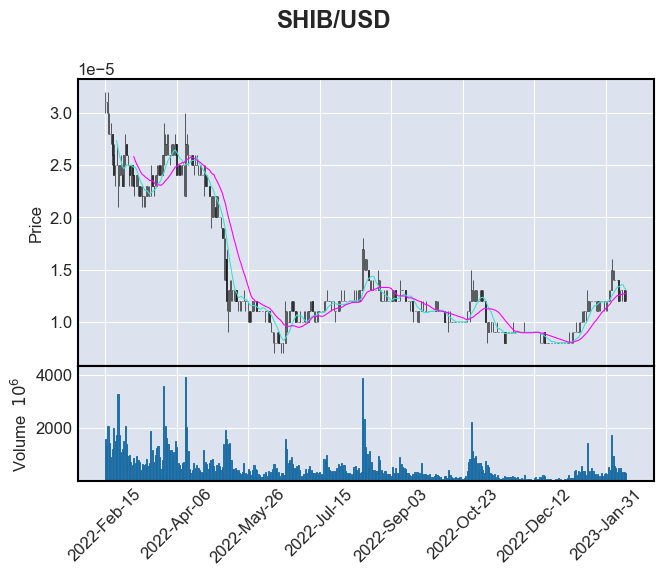

In [5]:
#Plotando um gráfico utilizando o plot do mplfinance

shibfinance.plot(year,type='candle',mav=(9,21),volume=True, title='SHIB/USD')

In [5]:
#Precisamos validar os valores nulos que existem.
print("Porcentagem de Volume financeiro nulo: %.2f%%" % (data.Volume[data.Volume==0].count()/data.Volume.count()*100))

Porcentagem de Volume financeiro nulo: 0.00%


In [6]:
#Descrever os dados coletados.
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.000014,0.000014,0.000014,0.000014,0.000014,5.650175e+08
std,0.000006,0.000006,0.000006,0.000006,0.000006,5.468227e+08
min,0.000008,0.000008,0.000007,0.000008,0.000008,4.453381e+07
25%,0.000010,0.000010,0.000010,0.000010,0.000010,2.401250e+08
50%,0.000012,0.000012,0.000011,0.000012,0.000012,4.005490e+08
75%,0.000014,0.000015,0.000014,0.000014,0.000014,6.838071e+08
max,0.000031,0.000032,0.000030,0.000031,0.000031,3.927624e+09


In [7]:
#Analisar se possuimos dados duplicados.
data.index.duplicated().sum()

0

<Axes: >

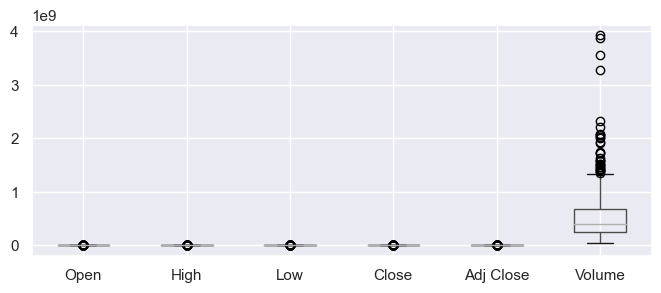

In [39]:
#Primeiro boxplot para analisarmos.
data.boxplot(figsize=(8,3))

<Axes: >

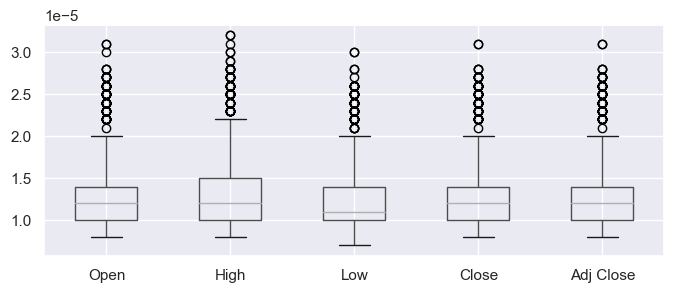

In [40]:
#Foi necessário remover o Volume, pois havia muita diferença dos valores.
#Analisado vários outliers.
data.drop('Volume', axis=1).boxplot(figsize=(8,3))

<Axes: xlabel='Date'>

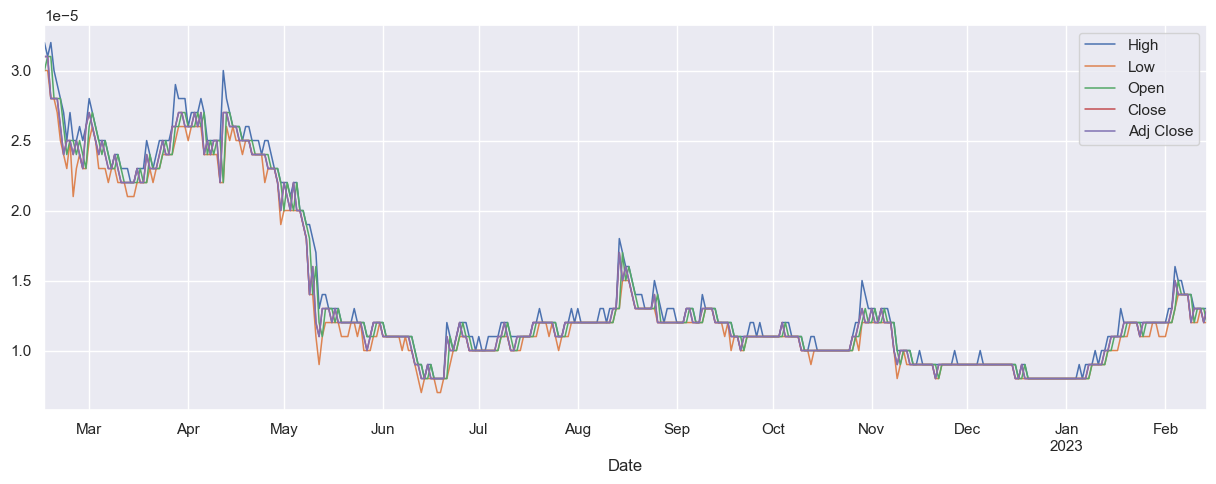

In [41]:
#Criação de um gráfico de linhas.
data[['High', 'Low', 'Open', 'Close', 'Adj Close']].plot.line(figsize=(15,5), linewidth=1.1)

In [9]:
#Novas informações para possíveis tratamentos
data['ns'] = range(0,len(data['Open']))         #Número sequencial.
data['reOpenClose'] = data.Close-data.Open      #Valor da diferença entre o valor de abertura e fechamento.
data['reHighLow'] = data.High-data.Low          #Valor da diferença entre o valor da máxima e mínima diária.
data['m9'] = data.Close.rolling(9).mean()       #Valor da média de 9 períodos do fechamento.
data['m21'] = data.Close.rolling(21).mean()     #Valor da média de 21 períodos do fechamento.
data['closingBigm9'] = (data.Close > data.m9)   #Valor de fechamento maior que a média de 9 períodos.
data['closingBigm21'] = (data.Close > data.m21) #Valor de fechamento maior que a média de 21 períodos.
data['m9Bigm21'] = (data.m9 > data.m21)         #Valor da média de 9 períodos é maior do que a de 21 períodos.
data['tend10'] = npy.array(data.Close.rolling(9).corr(data.ns))    #Valor da tendência atual para o período de 9 dias.
data['tend21'] = npy.array(data.Close.rolling(21).corr(data.ns))   #Valor da tendência atual para o período de 21 dias.
data['tend40'] = npy.array(data.Close.rolling(40).corr(data.ns))   #Valor da tendência atual para o período de 40 dias.
data['tend60'] = npy.array(data.Close.rolling(60).corr(data.ns))   #Valor da tendência atual para o período de 60 dias.
data['tend90'] = npy.array(data.Close.rolling(90).corr(data.ns))   #Valor da tendência atual para o período de 90 dias.
data['tend180'] = npy.array(data.Close.rolling(180).corr(data.ns)) #Valor da tendência atual para o período de 180 dias.
for i in range (0, 90):
    data['relationMax_' + str(i)] = data.Close - data.High.shift(periods=i)
    data['relationClose_' + str(i)] = data.Close - data.Close.shift(periods=i)

In [10]:
data[['Close', 'High','relationMax_10']].head()

,Close,High,relationMax_10
Date,,,
2022-02-15,0.000031,0.000032,NaN
2022-02-16,0.000031,0.000031,NaN
2022-02-17,0.000028,0.000032,NaN
2022-02-18,0.000028,0.000030,NaN
2022-02-19,0.000028,0.000029,NaN


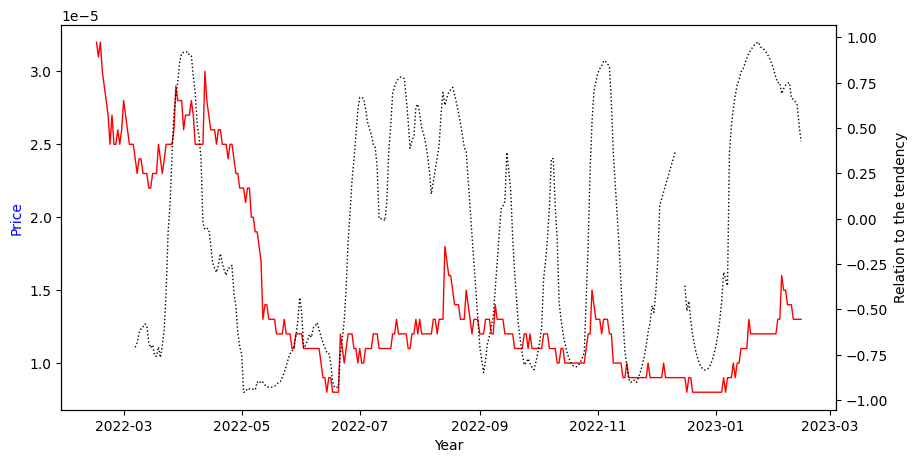

In [11]:
#Criação de um gráfico com uma linha pontilhada de tendências.
pic, ax1 = myplt.subplots(figsize = (10,5))
ax2 = ax1.twinx()
ax1.plot(data['High'], 'r', linewidth = 1)
ax2.plot(data['tend21'], color = '#000000', ls = ':', linewidth = 1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Price', color = 'b')
ax2.set_ylabel("Relation to the tendency")

myplt.show()

In [12]:
#Calculadora de porcentagem de crescimento do valor da moeda.
x = float(0.000000001009)
percent = 100
y = float(0.00001323)
z = (percent*y)/x
print('Total de crescimento: %2f%%' % + z)

Total de crescimento: 1311199.207136%


In [90]:
data

,Open,High,Low,Close,Adj Close,Volume,ns,reOpenClose,reHighLow,m9,...,relationClose_85,relationMax_86,relationClose_86,relationMax_87,relationClose_87,relationMax_88,relationClose_88,relationMax_89,relationClose_89,mark
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-13,0.000013,0.000013,0.000013,0.000013,0.000013,350167369,179,0.000000e+00,0.000000e+00,0.000012,...,9.999994e-07,9.999994e-07,9.999994e-07,0.000000,9.999994e-07,0.000000,0.000000,0.000000,9.999994e-07,1
2022-08-14,0.000013,0.000018,0.000013,0.000017,0.000017,3873103860,180,4.000000e-06,5.000001e-06,0.000013,...,5.000000e-06,5.000000e-06,5.000000e-06,0.000005,5.000000e-06,0.000004,0.000005,0.000004,4.000000e-06,0
2022-08-15,0.000017,0.000017,0.000015,0.000015,0.000015,2327359499,181,-2.000001e-06,2.000001e-06,0.000013,...,2.999999e-06,2.999999e-06,2.999999e-06,0.000003,2.999999e-06,0.000003,0.000003,0.000002,2.999999e-06,0
2022-08-16,0.000015,0.000016,0.000015,0.000016,0.000016,1302891507,182,1.000000e-06,1.000000e-06,0.000014,...,4.000000e-06,4.000000e-06,4.000000e-06,0.000004,4.000000e-06,0.000004,0.000004,0.000004,4.000000e-06,0
2022-08-17,0.000016,0.000016,0.000015,0.000015,0.000015,1047374797,183,-1.000000e-06,1.000000e-06,0.000014,...,2.999999e-06,2.000000e-06,2.999999e-06,0.000003,2.999999e-06,0.000003,0.000003,0.000003,2.999999e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-10,0.000012,0.000013,0.000012,0.000013,0.000013,496921255,360,9.999994e-07,9.999994e-07,0.000013,...,4.000000e-06,3.000000e-06,4.000000e-06,0.000004,4.000000e-06,0.000004,0.000004,0.000003,4.000000e-06,0
2023-02-11,0.000013,0.000013,0.000012,0.000013,0.000013,322458630,361,0.000000e+00,9.999994e-07,0.000014,...,4.000000e-06,4.000000e-06,4.000000e-06,0.000003,4.000000e-06,0.000004,0.000004,0.000004,4.000000e-06,0
2023-02-12,0.000013,0.000013,0.000013,0.000013,0.000013,342923413,362,0.000000e+00,0.000000e+00,0.000014,...,4.000000e-06,4.000000e-06,4.000000e-06,0.000004,4.000000e-06,0.000003,0.000004,0.000004,4.000000e-06,0


In [13]:
#Criação de uma classe com os dias futuros e a secure como seguro de 15% de lucro.
class NClass(): pass
crit = NClass()
crit.DaysAhead = 30
crit.sec = 0.15

In [14]:
#Criação da nossa variavel de objetivo, nomeando ela como mark.
mark = npy.array(range(0,len(data.index)))
i = 0
for indexData in data.index:
    mark[i] = 0
    count = 1
    while count <= crit.DaysAhead:
        i2 = i + count
        if i2 >= len(data.index): break
        if data.iloc[i2]['High']/data.iloc[i]['Close'] >= 1+crit.sec: mark[i] = 1
        count += 1
    i += 1
    
data['mark'] = mark

In [15]:
#Validar os dados criados.
data.sample(20)

,Open,High,Low,Close,Adj Close,Volume,ns,reOpenClose,reHighLow,m9,...,relationClose_85,relationMax_86,relationClose_86,relationMax_87,relationClose_87,relationMax_88,relationClose_88,relationMax_89,relationClose_89,mark
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-10,0.000013,0.000013,0.000013,0.000013,0.000013,650509216,207,0.000000e+00,0.000000e+00,0.000012,...,0.000005,4.000000e-06,5.000000e-06,0.000004,4.000000e-06,0.000005,5.000000e-06,4.000000e-06,0.000005,0
2022-06-17,0.000008,0.000008,0.000008,0.000008,0.000008,210833181,122,0.000000e+00,0.000000e+00,0.000009,...,-0.000017,-1.700000e-05,-1.600000e-05,-0.000016,-1.500000e-05,-0.000015,-1.500000e-05,-1.600000e-05,-0.000015,1
2022-08-02,0.000012,0.000012,0.000012,0.000012,0.000012,395081060,168,0.000000e+00,0.000000e+00,0.000012,...,-0.000002,-6.999999e-06,-6.000000e-06,-0.000008,-6.999999e-06,-0.000008,-7.999999e-06,-1.000000e-05,-0.000008,1
2022-09-16,0.000012,0.000012,0.000011,0.000012,0.000012,240124971,213,0.000000e+00,1.000000e-06,0.000012,...,0.000002,1.000000e-06,2.000001e-06,0.000000,1.000000e-06,0.000004,4.000000e-06,4.000000e-06,0.000004,0
2022-06-03,0.000011,0.000011,0.000011,0.000011,0.000011,255259560,108,0.000000e+00,0.000000e+00,0.000011,...,-0.000012,-1.300000e-05,-1.300000e-05,-0.000012,-1.200000e-05,-0.000013,-1.200000e-05,-1.400000e-05,-0.000013,0
2023-02-12,0.000013,0.000013,0.000013,0.000013,0.000013,342923413,362,0.000000e+00,0.000000e+00,0.000014,...,0.000004,4.000000e-06,4.000000e-06,0.000004,4.000000e-06,0.000003,4.000000e-06,4.000000e-06,0.000004,0
2023-01-13,0.000009,0.000010,0.000009,0.000010,0.000010,363109913,332,9.999994e-07,9.999994e-07,0.000009,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1
2022-05-31,0.000012,0.000012,0.000012,0.000012,0.000012,475903019,105,0.000000e+00,0.000000e+00,0.000012,...,-0.000011,-1.300000e-05,-1.200000e-05,-0.000013,-1.300000e-05,-0.000013,-1.200000e-05,-1.400000e-05,-0.000013,0
2022-06-12,0.000009,0.000009,0.000008,0.000009,0.000009,468217434,117,0.000000e+00,1.000000e-06,0.000010,...,-0.000015,-1.400000e-05,-1.300000e-05,-0.000014,-1.300000e-05,-0.000014,-1.400000e-05,-1.300000e-05,-0.000013,1


<Axes: >

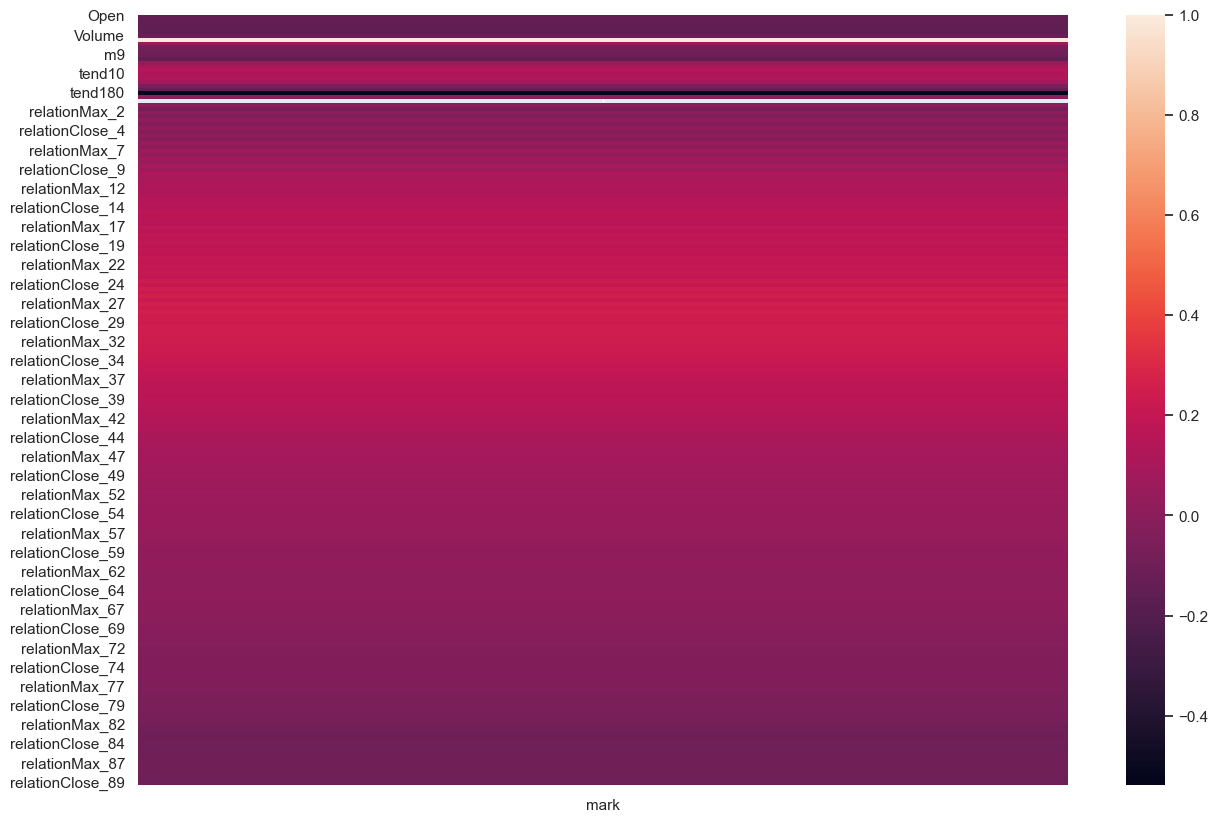

In [18]:
#Teste do metodo pearson.
tendency_new = data.corr(method='pearson', min_periods=0.0000001)[['mark']]
myplt.figure(figsize=(15,10))
sns.heatmap(tendency_new)

C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\1051986927.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.reHighLow[data.mark==1])
C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\1051986927.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.reHighLow[data.mark==0])
C:\Users\e

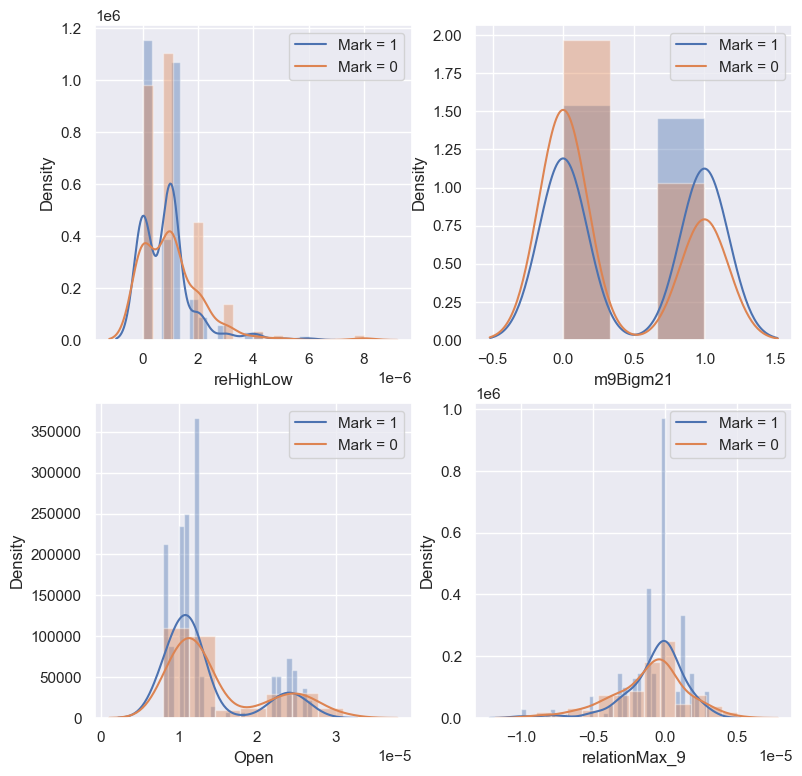

In [16]:
#Criação das curvas de densidade
myplt.figure(figsize=(9,9))
sns.set(font_scale=1)

first_plot = myplt.subplot(2,2,1)
sns.distplot(data.reHighLow[data.mark==1])
sns.distplot(data.reHighLow[data.mark==0])
first_plot.legend(['Mark = 1', 'Mark = 0'])

second_plot = myplt.subplot(2,2,2)
sns.distplot(data.m9Bigm21[data.mark==1])
sns.distplot(data.m9Bigm21[data.mark==0])
second_plot.legend(['Mark = 1', 'Mark = 0'])

third_plot = myplt.subplot(2,2,3)
sns.distplot(data.Open[data.mark==1])
sns.distplot(data.Open[data.mark==0])
third_plot.legend(['Mark = 1', 'Mark = 0'])

fourth_plot = myplt.subplot(2,2,4)
sns.distplot(data.relationMax_9[data.mark==1])
sns.distplot(data.relationMax_9[data.mark==0])
fourth_plot.legend(['Mark = 1', 'Mark = 0'])

In [19]:
#Analisando os dados que possuem NaN.
pnd.DataFrame({'Values NaN': data.isna().sum()})

,Values NaN
Open,0
High,0
Low,0
Close,0
Adj Close,0
...,...
relationMax_88,0
relationClose_88,0
relationMax_89,0
relationClose_89,0


In [18]:
#Removendo os dados com NaN.
data = data.dropna()

In [20]:
#Criando a frequencia que o objetivo é atingido.
frq = pnd.DataFrame(columns=['metricas', '0', '1'])
frq = frq.append({'metricas' : 'mark', '0': data.mark[data.mark==0].count(),
                  '1' : data.mark[data.mark==1].count()}, 
                 ignore_index=True)
prob_frq = frq[frq.metricas=='mark']['1'].values/npy.sum(frq[frq.metricas=='mark'][['0','1']].values)

print(frq)
print('Frequência do mark: %.2f%%' % (100*prob_frq))

  metricas   0   1
0     mark  69  75
Frequência do mark: 52.08%


C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\1067343309.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frq = frq.append({'metricas' : 'mark', '0': data.mark[data.mark==0].count(),


In [93]:
#Importando o sklearn para iniciar o projeto de Machine Learning
#Criando as variáveis de entrada, saída e testes.
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, confusion_matrix, auc

Main_dataFrame = data.dropna()
for i in data.columns: Main_dataFrame[i] = Main_dataFrame[i].astype(float)
y = Main_dataFrame.mark 
X = Main_dataFrame.drop(['mark'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_new = Main_dataFrame.drop(['mark'], axis=1).tail(1)
for i in X_new.columns: X_new[i] = X_new[i].astype(float)

In [95]:
#Realizando um print dos dados de treinamento.
X_train

,Open,High,Low,Close,Adj Close,Volume,ns,reOpenClose,reHighLow,m9,...,relationMax_85,relationClose_85,relationMax_86,relationClose_86,relationMax_87,relationClose_87,relationMax_88,relationClose_88,relationMax_89,relationClose_89
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-11,0.000013,0.000013,0.000013,0.000013,0.000013,539982450.0,208.0,0.000000e+00,0.000000e+00,0.000013,...,5.000000e-06,5.000000e-06,5.000000e-06,0.000005,0.000004,0.000005,4.000000e-06,0.000004,5.000000e-06,0.000005
2022-09-23,0.000011,0.000011,0.000011,0.000011,0.000011,337933781.0,220.0,0.000000e+00,0.000000e+00,0.000011,...,1.000000e-06,1.000000e-06,0.000000e+00,0.000001,0.000000,0.000001,-1.000000e-06,0.000000,-1.000000e-06,0.000000
2022-11-20,0.000009,0.000009,0.000009,0.000009,0.000009,138213208.0,278.0,0.000000e+00,0.000000e+00,0.000009,...,-4.000000e-06,-3.000000e-06,-5.000000e-06,-0.000003,-0.000006,-0.000005,-4.000000e-06,-0.000004,-4.000000e-06,-0.000004
2022-09-07,0.000012,0.000012,0.000012,0.000012,0.000012,322581607.0,204.0,0.000000e+00,0.000000e+00,0.000012,...,4.000000e-06,4.000000e-06,3.000000e-06,0.000004,0.000003,0.000003,2.000001e-06,0.000003,1.000000e-06,0.000002
2022-09-08,0.000012,0.000012,0.000012,0.000012,0.000012,323307668.0,205.0,0.000000e+00,0.000000e+00,0.000012,...,3.000000e-06,3.000000e-06,4.000000e-06,0.000004,0.000003,0.000004,3.000000e-06,0.000003,2.000001e-06,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-05,0.000013,0.000013,0.000012,0.000012,0.000012,572196598.0,263.0,-9.999994e-07,9.999994e-07,0.000012,...,-9.999994e-07,-9.999994e-07,-9.999994e-07,0.000000,0.000000,0.000000,-9.999994e-07,0.000000,-9.999994e-07,0.000000
2022-12-26,0.000008,0.000008,0.000008,0.000008,0.000008,54139505.0,314.0,0.000000e+00,0.000000e+00,0.000008,...,-3.000000e-06,-3.000000e-06,-3.000000e-06,-0.000003,-0.000003,-0.000003,-3.000000e-06,-0.000003,-3.000000e-06,-0.000003
2022-08-27,0.000012,0.000013,0.000012,0.000012,0.000012,437249950.0,193.0,0.000000e+00,9.999994e-07,0.000013,...,1.000000e-06,1.000000e-06,1.000000e-06,0.000001,0.000000,0.000001,0.000000e+00,0.000000,0.000000e+00,0.000000


In [128]:
#Vamos criar um novo dataset para o objetivo de 15% em 30 dias
predic_y = pnd.DataFrame(columns=('cripto', 'frq', 'model', 'predicTest','recallTest', 'precAll','recallAll','mark'))
predic_y['model'] = ['Regressao', 'Arvore', 'XGBoost']
predic_y['frq'] = float(prob_frq)
predic_y['cripto'] = 'SHIB'

In [129]:
#Teste do dataset dos modelos.
predic_y

,cripto,frq,model,predicTest,recallTest,precAll,recallAll,mark
0,SHIB,0.520833,Regressao,NaN,NaN,NaN,NaN,NaN
1,SHIB,0.520833,Arvore,NaN,NaN,NaN,NaN,NaN
2,SHIB,0.520833,XGBoost,NaN,NaN,NaN,NaN,NaN


In [130]:
#importando as bibliotecas do statsmodels para criar a formula do modelo preditivo de Logistica Regressiva.
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

In [131]:
#Criando o modelo de Regressão Logistica.
all_col_join = ' + '.join(Main_dataFrame.drop(['mark'], axis=1).columns)
formula = "mark ~ High + Low + Open + Close + Volume + reOpenClose + reHighLow + m9 + m21 + tend10 + \
tend21 + tend90 + closingBigm9 + closingBigm21"

model = smf.glm(formula=formula, data=Main_dataFrame, family = sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   mark   No. Observations:                  144
Model:                            GLM   Df Residuals:                      137
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -82.337
Date:                Sat, 11 Mar 2023   Deviance:                       164.67
Time:                        22:47:30   Pearson chi2:                     131.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2142
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.3384      4.184      2.949

In [133]:
#Treinando os dados usando a Regressão Logistica.
model = LogisticRegression(penalty='none', solver='newton-cg')

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                  l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='none',
                  random_state=None, solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
print(model.coef_)

C:\Users\ernan\PycharmProjects\ShibProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ernan\PycharmProjects\ShibProject\venv\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ernan\PycharmProjects\ShibProject\venv\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ernan\PycharmProjects\ShibProject\venv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[[-9.51800474e-07 -1.69038371e-07 -1.82274014e-06 -2.12816498e-06
  -2.12816498e-06 -2.15468121e-09 -9.91453316e-04 -1.17636451e-06
   1.65370177e-06 -5.96701874e-07 -2.54796804e-06 -1.24205109e+00
   1.59449435e-01 -9.51712912e-01  8.15719838e-01  7.76327905e-01
   5.20433977e-01 -8.75933555e-01 -9.63135050e-01 -3.78092310e+00
  -1.95912661e-06  0.00000000e+00 -2.50266597e-06 -1.17636451e-06
  -5.93816346e-08 -1.50656225e-06 -2.74720694e-07 -2.04463957e-06
   5.99114877e-07 -5.40370843e-07 -4.64436077e-06 -5.23440737e-06
  -7.65017868e-07 -2.19922857e-06  3.85458450e-07 -7.35471777e-07
  -1.94614631e-06 -3.46123073e-07 -7.17687833e-07 -1.49756930e-06
  -1.63015270e-06 -1.56369150e-06 -2.85593024e-06 -9.04393885e-07
  -6.98574667e-06 -2.74630580e-06 -2.80868721e-06  1.76873850e-07
  -6.77000134e-07 -1.25092765e-06  3.04195734e-06  2.63158944e-06
   2.87561907e-06  2.10392312e-06  7.37608912e-06  4.09804794e-06
   8.71388738e-06  7.73433874e-06  7.07598239e-06  7.49720263e-06
   7.33007

In [134]:
#Criação de uma matriz de confusão para demonstrar a Precision, Recall e F-Score.

print("\n\nCriação da Matriz de confusão em andamento...\n")
print(confusion_matrix(y_test, model.predict(X_test)))

#Criando um modelo de report para apresentar todas as informações que queremos.
print("\n\nCriando um modelo de reporte com as informações desejadas...\n")
print(classification_report(y, model.predict(X)))

print("Mostrando o reporte de teste para a Precisão, Recall e F-Score: \n")
print(classification_report(y_test, model.predict(X_test)))



Criação da Matriz de confusão em andamento...

[[15  4]
 [ 5 20]]


Criando um modelo de reporte com as informações desejadas...

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85        69
         1.0       0.86      0.87      0.86        75

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144

Mostrando o reporte de teste para a Precisão, Recall e F-Score: 

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        19
         1.0       0.83      0.80      0.82        25

    accuracy                           0.80        44
   macro avg       0.79      0.79      0.79        44
weighted avg       0.80      0.80      0.80        44



In [135]:
#Inserindo os dados no nosso dataset dos modelos preditivos.
predic_y.mark[predic_y.model=='Regressao'] = model.predict(X_new)
predic_y.precAll[predic_y.model=="Regressao"] = precision_score(y, model.predict(X))
predic_y.predicTest[predic_y.model=='Regressao'] = precision_score(y_test, model.predict(X_test))
predic_y.recallAll[predic_y.model=='Regressao'] = recall_score(y, model.predict(X))
predic_y.recallTest[predic_y.model=='Regressao'] = recall_score(y_test, model.predict(X_test))

predic_y

C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\1921451524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic_y.mark[predic_y.model=='Regressao'] = model.predict(X_new)
C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\1921451524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic_y.precAll[predic_y.model=="Regressao"] = precision_score(y, model.predict(X))
C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\1921451524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,cripto,frq,model,predicTest,recallTest,precAll,recallAll,mark
0,SHIB,0.520833,Regressao,0.833333,0.8,0.855263,0.866667,0.0
1,SHIB,0.520833,Arvore,NaN,NaN,NaN,NaN,NaN
2,SHIB,0.520833,XGBoost,NaN,NaN,NaN,NaN,NaN


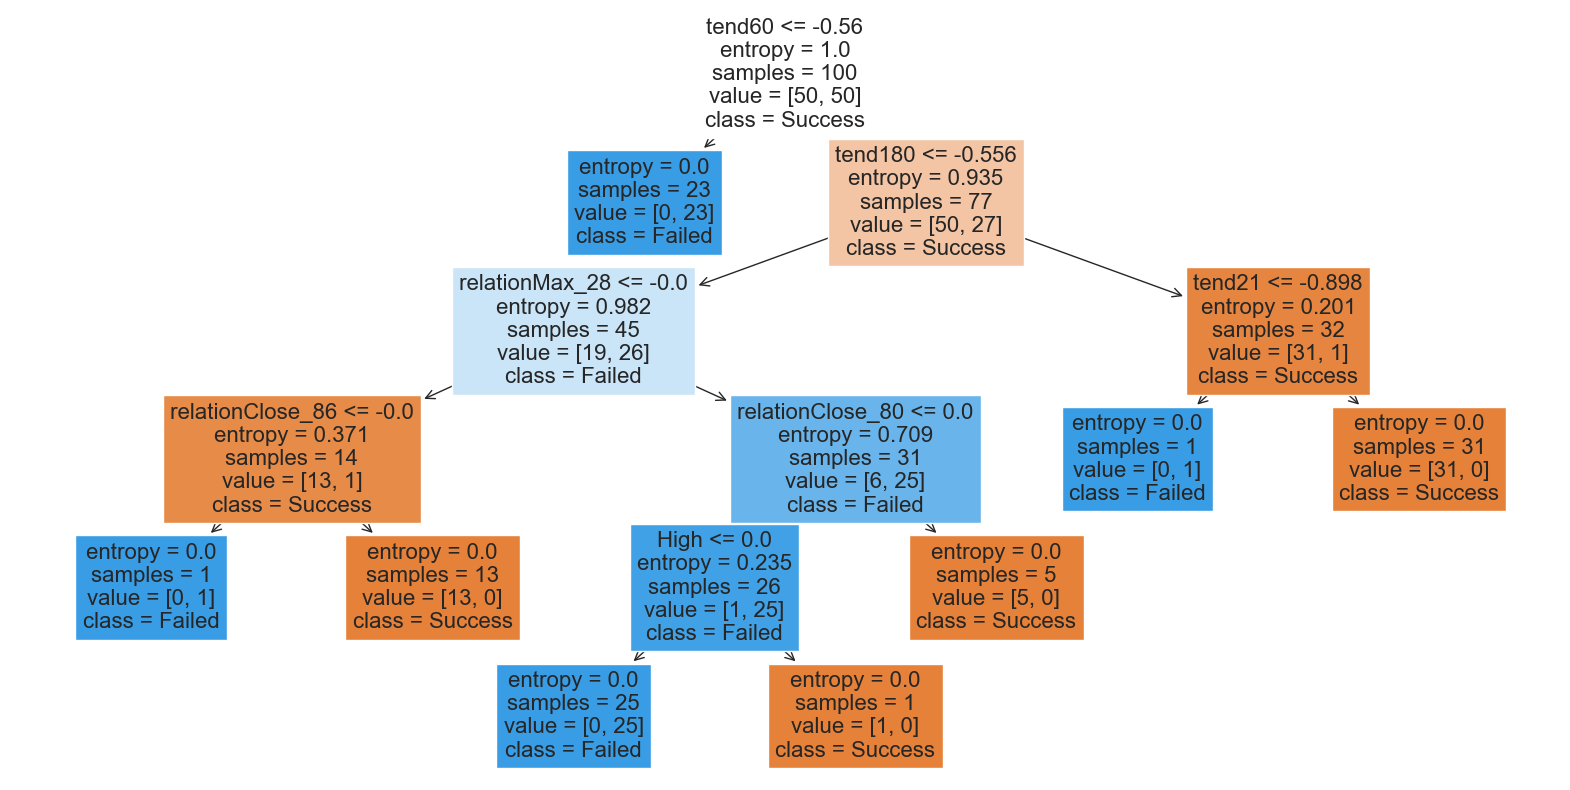

In [139]:
#Criando um modelo preditivo utilizando Tree Classifier.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(X_train, y_train)
my_figure = myplt.figure(figsize=(20 , 10))
my_tree = tree.plot_tree(model, feature_names=X.columns, class_names=['Success', 'Failed'], filled=True)


In [141]:
#Criação de uma matriz de confusão para demonstrar a Precision, Recall e F-Score.

print("\n\nCriação da Matriz de confusão em andamento...\n")
print(confusion_matrix(y_test, model.predict(X_test)))

#Criando um modelo de report para apresentar todas as informações que queremos.
print("\n\nCriando um modelo de reporte com as informações desejadas...\n")
print(classification_report(y, model.predict(X)))

print("Mostrando o reporte de teste para a Precisão, Recall e F-Score: \n")
print(classification_report(y_test, model.predict(X_test)))



Criação da Matriz de confusão em andamento...

[[11  8]
 [ 0 25]]


Criando um modelo de reporte com as informações desejadas...

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94        69
         1.0       0.90      1.00      0.95        75

    accuracy                           0.94       144
   macro avg       0.95      0.94      0.94       144
weighted avg       0.95      0.94      0.94       144

Mostrando o reporte de teste para a Precisão, Recall e F-Score: 

              precision    recall  f1-score   support

         0.0       1.00      0.58      0.73        19
         1.0       0.76      1.00      0.86        25

    accuracy                           0.82        44
   macro avg       0.88      0.79      0.80        44
weighted avg       0.86      0.82      0.81        44



In [138]:
#Inserindo os dados no nosso dataset dos modelos preditivos.
predic_y.mark[predic_y.model=='Arvore'] = model.predict(X_new)
predic_y.precAll[predic_y.model=="Arvore"] = precision_score(y, model.predict(X))
predic_y.predicTest[predic_y.model=='Arvore'] = precision_score(y_test, model.predict(X_test))
predic_y.recallAll[predic_y.model=='Arvore'] = recall_score(y, model.predict(X))
predic_y.recallTest[predic_y.model=='Arvore'] = recall_score(y_test, model.predict(X_test))

predic_y

C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\866710205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic_y.mark[predic_y.model=='Arvore'] = model.predict(X_new)
C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\866710205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic_y.precAll[predic_y.model=="Arvore"] = precision_score(y, model.predict(X))
C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\866710205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,cripto,frq,model,predicTest,recallTest,precAll,recallAll,mark
0,SHIB,0.520833,Regressao,0.833333,0.8,0.855263,0.866667,0.0
1,SHIB,0.520833,Arvore,0.8,0.96,0.925,0.986667,0.0
2,SHIB,0.520833,XGBoost,NaN,NaN,NaN,NaN,NaN


In [105]:
#Instalando algumas bibliotecas para testar RNA.
!pip install keras
!pip install TensorFlow

     ---------------------------------------- 0.0/266.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/266.3 MB 6.7 MB/s eta 0:00:40
     ---------------------------------------- 0.9/266.3 MB 9.8 MB/s eta 0:00:28
     --------------------------------------- 1.5/266.3 MB 10.9 MB/s eta 0:00:25
     --------------------------------------- 2.3/266.3 MB 12.1 MB/s eta 0:00:22
     --------------------------------------- 3.1/266.3 MB 13.3 MB/s eta 0:00:20
      -------------------------------------- 4.0/266.3 MB 14.3 MB/s eta 0:00:19
      -------------------------------------- 5.0/266.3 MB 15.2 MB/s eta 0:00:18
      -------------------------------------- 6.1/266.3 MB 16.2 MB/s eta 0:00:17
     - ------------------------------------- 7.4/266.3 MB 17.4 MB/s eta 0:00:15
     - ------------------------------------- 8.7/266.3 MB 18.6 MB/s eta 0:00:14
     - ------------------------------------ 10.3/266.3 MB 20.5 MB/s eta 0:00:13
     - ------------------------------------ 11.

In [126]:
#Testando o keras
from keras import Sequential
from keras.layers import Dense
import keras

model = Sequential()

model.add(Dense(15, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
model.add(Dense(7, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=300, verbose = False)
eval_model = model.evaluate(X_train, y_train)

eval_model

4/4 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.5000


[0.5, 0.5]



Criação da Matriz de confusão em andamento...

2/2 [==============================] - 0s 997us/step
[[19  0]
 [25  0]]


Criando um modelo de reporte com as informações desejadas...

5/5 [==============================] - 0s 997us/step
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65        69
         1.0       0.00      0.00      0.00        75

    accuracy                           0.48       144
   macro avg       0.24      0.50      0.32       144
weighted avg       0.23      0.48      0.31       144

Mostrando o reporte de teste para a Precisão, Recall e F-Score: 

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.43      1.00      0.60        19
         1.0       0.00      0.00      0.00        25

    accuracy                           0.43        44
   macro avg       0.22      0.50      0.30        44
weighted avg       0.19      0.43      0.26   

C:\Users\ernan\PycharmProjects\ShibProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ernan\PycharmProjects\ShibProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ernan\PycharmProjects\ShibProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [157]:
#Importando o XGBoost e criando nosso modelo preditivo.
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=3, scale_pos_weight=0.2, objective='binary:logitraw')
model.fit(X_train, y_train)
predic_y_temp = model.predict(X_test)
precision = accuracy_score(y_test, predic_y_temp)

print("Accuracy: %.2f%%" % (precision * 100))

Accuracy: 90.91%


In [158]:
precision

0.9090909090909091

In [159]:
#Criação de uma matriz de confusão para demonstrar a Precision, Recall e F-Score.

print("\n\nCriação da Matriz de confusão em andamento...\n")
print(confusion_matrix(y_test, model.predict(X_test)))

#Criando um modelo de report para apresentar todas as informações que queremos.
print("\n\nCriando um modelo de reporte com as informações desejadas...\n")
print(classification_report(y, model.predict(X)))

print("Mostrando o reporte de teste para a Precisão, Recall e F-Score: \n")
print(classification_report(y_test, model.predict(X_test)))



Criação da Matriz de confusão em andamento...

[[19  0]
 [ 4 21]]


Criando um modelo de reporte com as informações desejadas...

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        69
         1.0       1.00      0.91      0.95        75

    accuracy                           0.95       144
   macro avg       0.95      0.95      0.95       144
weighted avg       0.96      0.95      0.95       144

Mostrando o reporte de teste para a Precisão, Recall e F-Score: 

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90        19
         1.0       1.00      0.84      0.91        25

    accuracy                           0.91        44
   macro avg       0.91      0.92      0.91        44
weighted avg       0.92      0.91      0.91        44



In [160]:
#Inserindo os dados no nosso dataset dos modelos preditivos.
predic_y.mark[predic_y.model=='XGBoost'] = model.predict(X_new)
predic_y.precAll[predic_y.model=="XGBoost"] = precision_score(y, model.predict(X))
predic_y.predicTest[predic_y.model=='XGBoost'] = precision_score(y_test, model.predict(X_test))
predic_y.recallAll[predic_y.model=='XGBoost'] = recall_score(y, model.predict(X))
predic_y.recallTest[predic_y.model=='XGBoost'] = recall_score(y_test, model.predict(X_test))

predic_y

C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\4034818012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic_y.mark[predic_y.model=='XGBoost'] = model.predict(X_new)
C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\4034818012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predic_y.precAll[predic_y.model=="XGBoost"] = precision_score(y, model.predict(X))
C:\Users\ernan\AppData\Local\Temp\ipykernel_14592\4034818012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,cripto,frq,model,predicTest,recallTest,precAll,recallAll,mark
0,SHIB,0.520833,Regressao,0.833333,0.8,0.855263,0.866667,0.0
1,SHIB,0.520833,Arvore,0.8,0.96,0.925,0.986667,0.0
2,SHIB,0.520833,XGBoost,1.0,0.84,1.0,0.906667,0


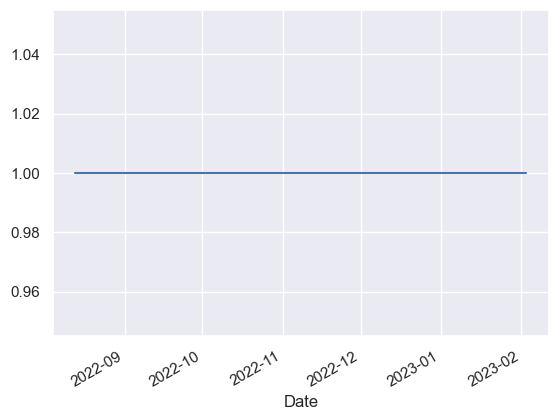

In [167]:
#Validação das datas onde os valores atingiram os objetivos.
igual_um = data.loc[data['mark'] == 1]

igual_um.groupby('Date').size().plot(kind='line')
myplt.show()